In [45]:
import cv2
import glob
import os
from matplotlib import pyplot as plt

## Focus assesment algorithm

In [46]:
def sobel_gradmap(img):
    grad_x = cv2.Sobel(img, cv2.CV_16S, 1, 0)
    grad_y = cv2.Sobel(img, cv2.CV_16S, 0, 1)
    abs_grad_x = cv2.convertScaleAbs(grad_x)
    abs_grad_y = cv2.convertScaleAbs(grad_y)
    grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
    return grad

def features_focus(img_path):
    img = cv2.imread(img_path)
    rows,cols,_ = img.shape
    img_gs = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
    O = sobel_gradmap(img_gs)
    img_lp_3 = cv2.blur(img_gs,(3,3))
    L1 = sobel_gradmap(img_lp_3)
    img_lp_5 = cv2.blur(img_gs,(5,5))
    L2 = sobel_gradmap(img_lp_5)
    # Compute focus measures
    FM1 = cv2.sumElems(O)[0]/(rows*cols)
    FM2 = FM1 - cv2.sumElems(L1)[0]/(rows*cols)
    FM3 = cv2.sumElems(L1)[0]/(rows*cols) - cv2.sumElems(L2)[0]/(rows*cols)
    return img_gs, img_lp_3, img_lp_5, FM1, FM2, FM3

The show_res_focus function shows different stages and metrics of one image.

In [47]:
def show_res_focus(img_path):
    im1, im2, im3, fm1, fm2, fm3 = features_focus(img_path)
    im1 = cv2.cvtColor(im1, cv2.COLOR_GRAY2RGB)
    im2 = cv2.cvtColor(im2, cv2.COLOR_GRAY2RGB)
    im3 = cv2.cvtColor(im3, cv2.COLOR_GRAY2RGB)
    fig = plt.figure(figsize=(12, 10))
    fig.add_subplot(1, 3, 1)
    plt.imshow(im1) 
    plt.axis('off') 
    plt.title("Původní obraz")
    fig.add_subplot(1, 3, 2)
    plt.imshow(im2)
    plt.axis('off') 
    plt.title("Dolní propust (jádro 3x3)")
    fig.add_subplot(1, 3, 3)
    plt.imshow(im3)
    plt.axis('off')
    plt.title("Dolní propust (jádro 5x5)")
    print("FM1: {:.2f}".format(fm1))
    print("FM2: {:.2f}".format(fm2))
    print("FM3: {:.2f}".format(fm3))

#### Finding the threshold

In [48]:
print('Blurred values: ')
print('FM1 ; FM2 ; FM3')
for img_path in glob.iglob(f'data/blurred/*.JPG'):
    _,_,_,f1,f2,f3 = features_focus(img_path)
    print("{:.2f}; {:.2f}; {:.2f}".format(f1, f2, f3))

print('\nFocused values: ')
print('FM1 ; FM2 ; FM3')
for img_path in glob.iglob(f'data/focused/*.JPG'):
    _,_,_,f1,f2,f3 = features_focus(img_path)
    print("{:.2f}; {:.2f}; {:.2f}".format(f1, f2, f3))

Blurred values: 
FM1 ; FM2 ; FM3


5.17; 1.89; 0.97
5.58; 2.11; 1.15
5.29; 1.81; 1.02
3.41; 0.96; 0.46
5.88; 2.49; 1.40
5.85; 2.26; 1.46
3.42; 0.91; 0.46
4.07; 1.11; 0.52
5.10; 1.66; 0.92
5.79; 2.20; 1.31

Focused values: 
FM1 ; FM2 ; FM3
5.98; 2.04; 1.30
7.53; 2.43; 1.43
7.19; 2.51; 1.45
6.57; 2.24; 1.38
6.76; 2.59; 1.46
6.50; 2.44; 1.45
5.93; 2.19; 1.38
7.00; 2.52; 1.41
6.69; 2.49; 1.47
5.44; 2.00; 1.31


#### Examples of images

FM1: 6.91
FM2: 2.23
FM3: 1.48


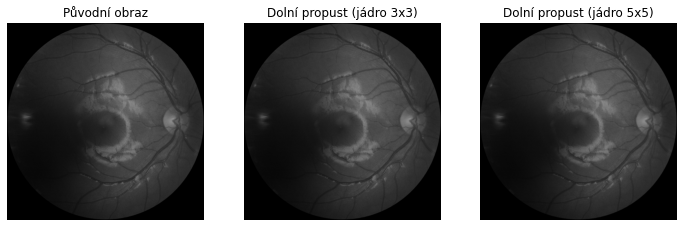

In [49]:
show_res_focus("./STRaDeSetB_preprocessed/002_R2_2569.JPG")

FM1: 5.80
FM2: 1.94
FM3: 1.05


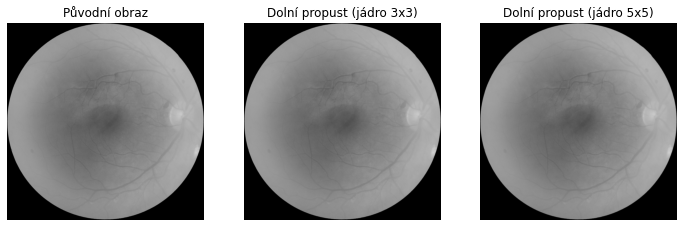

In [50]:
show_res_focus("./STRaDeSetB_preprocessed/Failure_cases/041_F1_3058.JPG")

FM1: 6.43
FM2: 2.52
FM3: 1.55


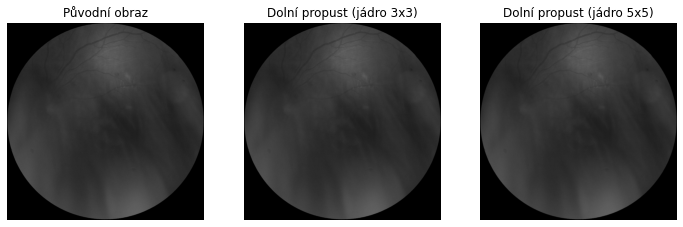

In [51]:
show_res_focus("./STRaDeSetB_preprocessed/Failure_cases/031_F2_2940.JPG")

Text(0.5, 1.0, 'c) FM2 = 2.52')

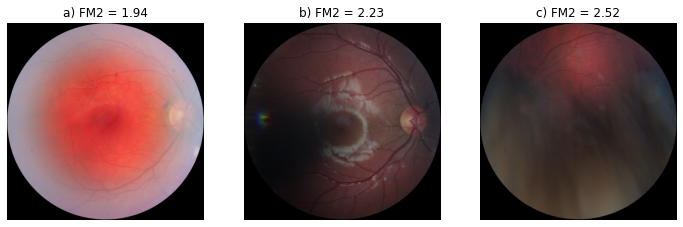

In [52]:
im1 = cv2.imread("./STRaDeSetB_preprocessed/Failure_cases/041_F1_3058.JPG")
im2 = cv2.imread("./STRaDeSetB_preprocessed/002_R2_2569.JPG")
im3 = cv2.imread("./STRaDeSetB_preprocessed/Failure_cases/031_F2_2940.JPG")
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)
im3 = cv2.cvtColor(im3, cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(12, 10))
fig.add_subplot(1, 3, 1)
plt.imshow(im1) 
plt.axis('off') 
plt.title("a) FM2 = 1.94")
fig.add_subplot(1, 3, 2)
plt.imshow(im2)
plt.axis('off') 
plt.title("b) FM2 = 2.23")
fig.add_subplot(1, 3, 3)
plt.imshow(im3)
plt.axis('off')
plt.title("c) FM2 = 2.52")

#### Dataset evaluation

In [53]:
# def dataset_results_focus(path):
    #TODO